In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

In [4]:
# Path to the data folders
RAW_DATA_FOLDER = '../data/RAW/'
CLEAN_DATA_FOLDER = '../data/CLEAN/'

## First Dataset: CMU Movies

In [5]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(RAW_DATA_FOLDER+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
CMU_movie_metadata.head(10)

# Load the character metadata
CMU_char_metadata = pd.read_csv(RAW_DATA_FOLDER+'CMU_Movies_Dataset/character.metadata.tsv', sep='\t', header=None)
CMU_char_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_release_date', 'character_name', 'actor_DOB', 'actor_gender', 'actor_height_meters', 'actor_ethnicity', 'actor_name', 'actor_age_at_movie_release', 'freebase_character_actor_map_ID', 'freebase_character_ID', 'freebase_actor_ID']

# Load the plot summaries
CMU_plot_summary = pd.read_csv(RAW_DATA_FOLDER+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

#######

# Include the other parts of the dataset if needed

######

## Initial analysis 

The intersection of countries for which we have the summaries and metadata has to be taken into account, instead of only the ones that we have the summary and/or metadata. 

In [15]:
print("Number of movies that we have the summary {}".format(CMU_plot_summary.shape[0]))
print("Number of movies that we have the characters infos {}".format(CMU_char_metadata.shape[0]))
print("Number of movies that we have the metadata {}".format(CMU_movie_metadata.shape[0]))

Number of movies that we have the summary 42303
Number of movies that we have the characters infos 450669
Number of movies that we have the metadata 81741


# Summary analysis 

We want to use movies summaries to characterise if a movie is violent or not. This require the use of NLP that lead to a restricted count of words that can be used. 

The number of words isn't equal to the number of characters ! 

### Number of words

In [90]:
len(CMU_plot_summary.plot_summary[0].split())

25

### Number of characters 

In [ ]:
CMU_plot_summary["Character counts of summary"] =CMU_plot_summary.plot_summary.agg(len,axis="index")

/tmp/ipykernel_16699/3050376215.py:1: FutureWarning: using <built-in function len> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  CMU_plot_summary["Word counts of summary"] =CMU_plot_summary.plot_summary.agg(len,axis="index")


In [87]:
CMU_plot_summary["Character counts of summary"].median()

np.float64(1079.0)

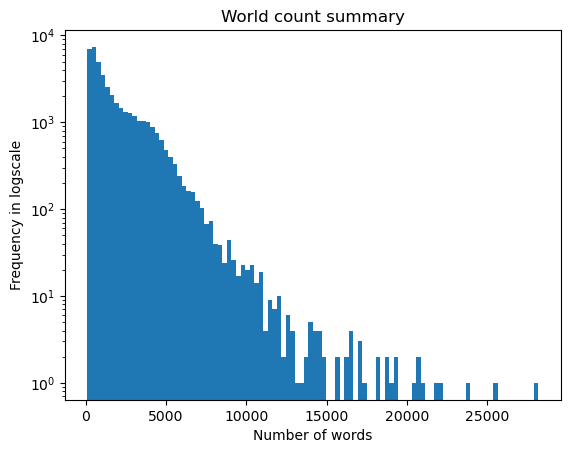

In [ ]:
plt.hist(CMU_plot_summary["Character counts of summary"], log=True,bins=100)
plt.title("Character count summary")
plt.ylabel("Frequency in logscale")
plt.xlabel("Number of characters")
plt.show()


We observe that the characters counts of the plots is skewed to the right. 

In [ ]:
CMU_plot_summary[CMU_plot_summary["Character counts of summary"] ==CMU_plot_summary["Character counts of summary"].max()]

,wikipedia_movie_ID,plot_summary,Word counts of summary
8888,22175264,The Big Beginning starts with Timmy wishing h...,28159


In [63]:
display(CMU_plot_summary["plot_summary"][8888])

' The Big Beginning starts with Timmy wishing he was in his own movie trilogy . In the first movie, he is chased by Crocker while they both have special powers. Then, he wishes he had a second movie, where he simply throws a ring into a volcano. In the third movie, he becomes "Timmy Totter" playing "Poofer Scoop" as he chases Poof around, until Vicky appears as "Moldy Wart" and chases him, which is then interrupted by Jorgen. He zaps away Timmy\'s fairies, before cryptically warning him to stick to the shadows and not to speak his name. Timmy then falls from the sky and lands in front of his house. Timmy claims was just like any one of his other normal mornings and walks inside his house. However, his parents don\'t seem to know who he is, thinking him a street urchin. When Timmy goes to school, everyone thinks that he\'s a new kid. Growing more and more confused, Timmy shouts his name through a megaphone. At that instant, an Eliminator  bursts into the class. Timmy manages to outrun t

In [ ]:
CMU_plot_summary[CMU_plot_summary["Character counts of summary"] ==CMU_plot_summary["Character counts of summary"].min()]

,wikipedia_movie_ID,plot_summary,Word counts of summary
42168,25105934,"At Christmastime, a divorcée returns to her h...",99


# Investigation of countries representation 

Upon inspection the countries listed in movie_countries are not in a decent format and need preprocessing for further analysis. The weird characters present the same structure "/m/09c7w0" and can the pattern can thus be used to extract only the countries, rather than its length of 12 strings. This latter is due to the fact that multiple countries can be listed in movies countries and not only one. 

The meaning of movie countries isn't clear from the dataset description and need further investigation. 

In [71]:
CMU_movie_metadata["movie_countries"]

0                {"/m/09c7w0": "United States of America"}
1                {"/m/09c7w0": "United States of America"}
2                                   {"/m/05b4w": "Norway"}
3                           {"/m/07ssc": "United Kingdom"}
4                                  {"/m/0345h": "Germany"}
                               ...                        
81736            {"/m/09c7w0": "United States of America"}
81737    {"/m/03rt9": "Ireland", "/m/07ssc": "United Ki...
81738            {"/m/09c7w0": "United States of America"}
81739                                {"/m/03_3d": "Japan"}
81740                              {"/m/0d060g": "Canada"}
Name: movie_countries, Length: 81741, dtype: object

In [ ]:
test = CMU_movie_metadata["movie_countries"][0]


: "United States of America"}


Special care has to be taken to the preprocessing of any text used and ideally the same preprocessing steps should be applied. 

### Ideas of preprocessing 

In [ ]:
# Convert to lowercase
text = test.lower()

# Remove HTML tags
text = re.sub(r'<.*?>', '', text)

# Remove special characters and punctuation
text = re.sub(r'[^\w\s]', '', text)

# Remove numbers
text = re.sub(r'\d+', '', text)

# Remove extra whitespace
text = re.sub(r'\s+', ' ', text).strip()